In [54]:
#import all packages in this tab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import os

In [55]:
train = pd.read_csv('../train.csv')
test = pd.read_csv('../test.csv')

In [56]:
print('Shape of the training csv data: ', train.shape)
print('Shape of the testing csv data: ', test.shape)
print('%-wise ratio of testing data: ',(test.shape[0]/(train.shape[0]+test.shape[0]))*100)

Shape of the training csv data:  (1549, 7)
Shape of the testing csv data:  (5, 7)
%-wise ratio of testing data:  0.32175032175032175


In [57]:
train.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [58]:
print("Basic information about the dataset: \n")
train.info()

Basic information about the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        1549 non-null   object 
 1   Weeks          1549 non-null   int64  
 2   FVC            1549 non-null   int64  
 3   Percent        1549 non-null   float64
 4   Age            1549 non-null   int64  
 5   Sex            1549 non-null   object 
 6   SmokingStatus  1549 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 84.8+ KB


### Plot to observe if male and female samples behave differently

In [59]:
fig = px.scatter_matrix(train, dimensions=["Weeks", "FVC", "Percent", "Age"], color="Sex")
fig.update_layout(
    plot_bgcolor='white'
)

### It is evident that the average ```FVC``` for female samples is way below than that of males so we probably need to handle this disparity later 
- Studies show that females in general have a slightly less FVC than males

In [60]:
print("Total no. of records: ",len(train['Patient'].unique()))
print("Weeks range from "+str(train['Weeks'].min())+" upto "+str(train['Weeks'].max()))
print("Median of the weeks is: ",np.median(train['Weeks']))
print("Age ranges from "+str(train['Age'].min())+" upto "+str(train['Age'].max()))
print("Median of age is: ",np.median(train['Age']))

Total no. of records:  176
Weeks range from -5 upto 133
Median of the weeks is:  28.0
Age ranges from 49 upto 88
Median of age is:  68.0


In [61]:
#Co-relation amongst attributes
corr = train.corr()
print(corr)

            Weeks       FVC   Percent       Age
Weeks    1.000000 -0.041447 -0.012536 -0.059473
FVC     -0.041447  1.000000  0.671964 -0.094125
Percent -0.012536  0.671964  1.000000  0.095949
Age     -0.059473 -0.094125  0.095949  1.000000


 - Percent and FVC have a co-relation
 - FVC and Age are inversely co-related 

In [62]:
fig = go.Figure()
Pat_Ids = train["Patient"].unique()
for i in Pat_Ids[:15]:
    fig.add_trace(go.Scatter(
            x=train[train["Patient"]==i]["Weeks"],
            y=train[train["Patient"]==i]["FVC"],
            name = i
        ))
fig.update_layout(
    plot_bgcolor='white'
)
fig.add_shape(
            type="line",
            x0=0,
            y0=1000,
            x1=0,
            y1=5000,
            line=dict(
                color="Red",
                width=2,
                dash="dashdot",
            ))


### FVC declines with increasing no of weeks

In [63]:
num_files = []
for i in Pat_Ids:
    num_files.append(len([name for name in os.listdir('../train/' + i + '/') if os.path.isfile(os.path.join('../train/' + i + '/', name))]))
fig = go.Figure(go.Bar(name='SF Zoo',x=Pat_Ids,y=num_files))
fig.update_layout(
    plot_bgcolor='white'
)



In [64]:
print("Average no files per-person across the dataset: ", np.mean(num_files))
print("Max no of files for any patient: ",max(num_files))
print("Min no of files for any patient: ",min(num_files))

Average no files per-person across the dataset:  187.64772727272728
Max no of files for any patient:  1018
Min no of files for any patient:  12


In [65]:
import plotly.express as px
data=px.bar(x=list(train['Weeks'].value_counts().keys()), y=list(train['Weeks'].value_counts().values))
data

### Distribution of weeks throughout the dataset

In [98]:
fig = px.bar(train, 
             y='SmokingStatus',
             color='SmokingStatus',
             opacity=1,
             barmode='relative',
             title="Distribution of Smokers")
fig.show()

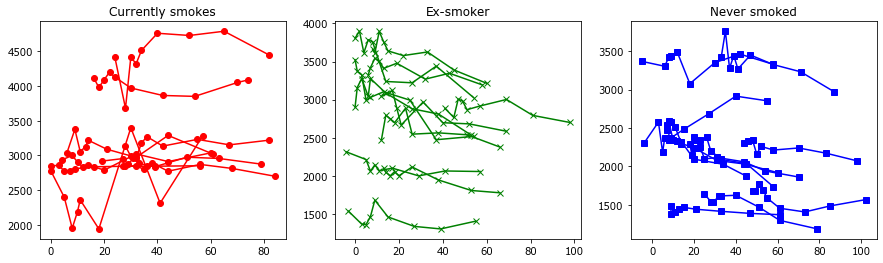

In [100]:
Patient_list = list(train.Patient.unique())
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

a = 0
b = 0
c = 0

for ID in Patient_list:
    grp = train.loc[train.Patient == ID]
    grp = grp[["Weeks","FVC", "SmokingStatus"]]

    if grp.iloc[0, 2] == "Currently smokes" and a <= 10:
        ax1.plot(grp.Weeks, grp.FVC, marker="o", color="red")
        ax1.set_title("Currently smokes") 
        a = a + 1
    elif grp.iloc[0, 2] == "Ex-smoker" and b <= 10:
        ax2.plot(grp.Weeks, grp.FVC, marker="x", color="green")
        ax2.set_title("Ex-smoker") 
        b = b + 1
    elif grp.iloc[0, 2] == "Never smoked" and c <= 10:
        ax3.plot(grp.Weeks, grp.FVC, marker="s", color="blue")
        ax3.set_title("Never smoked")
        c = c + 1
    else:
        pass

### FVC values of people vith varied smoking status